<h1> Density of states - Ly=Lz=50 , Lsc=Lnc=25

<h5> First, solve system and plot correlation function and check if system has ok convergence

In [1]:
import sys
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import solve_and_return_system_and_F_matrix
from main import define_system, solve_and_test_small_system, solve_for_sns_system
from plots import plot_pairing_amplitude, plot_density_of_states

from solve_hamiltonian import solve_system

In [2]:
# record runtime
import timeit
start = timeit.default_timer()


system, F_matrix = solve_and_test_small_system(max_num_iter = 20, phase=0) # nc_25, sc=25, ly=lz=50, u=-4.2
#system = System(phase=0, L_y = 50,L_z=50, L_sc_0 = 0, L_nc=25, L_sc=25, L_soc=0, mu_sc = 0.9, mu_nc = 0.9, mu_soc = 0.85, u_sc = -4.2, beta=100)

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

num iteration is  17
Time:  391.18443340898375


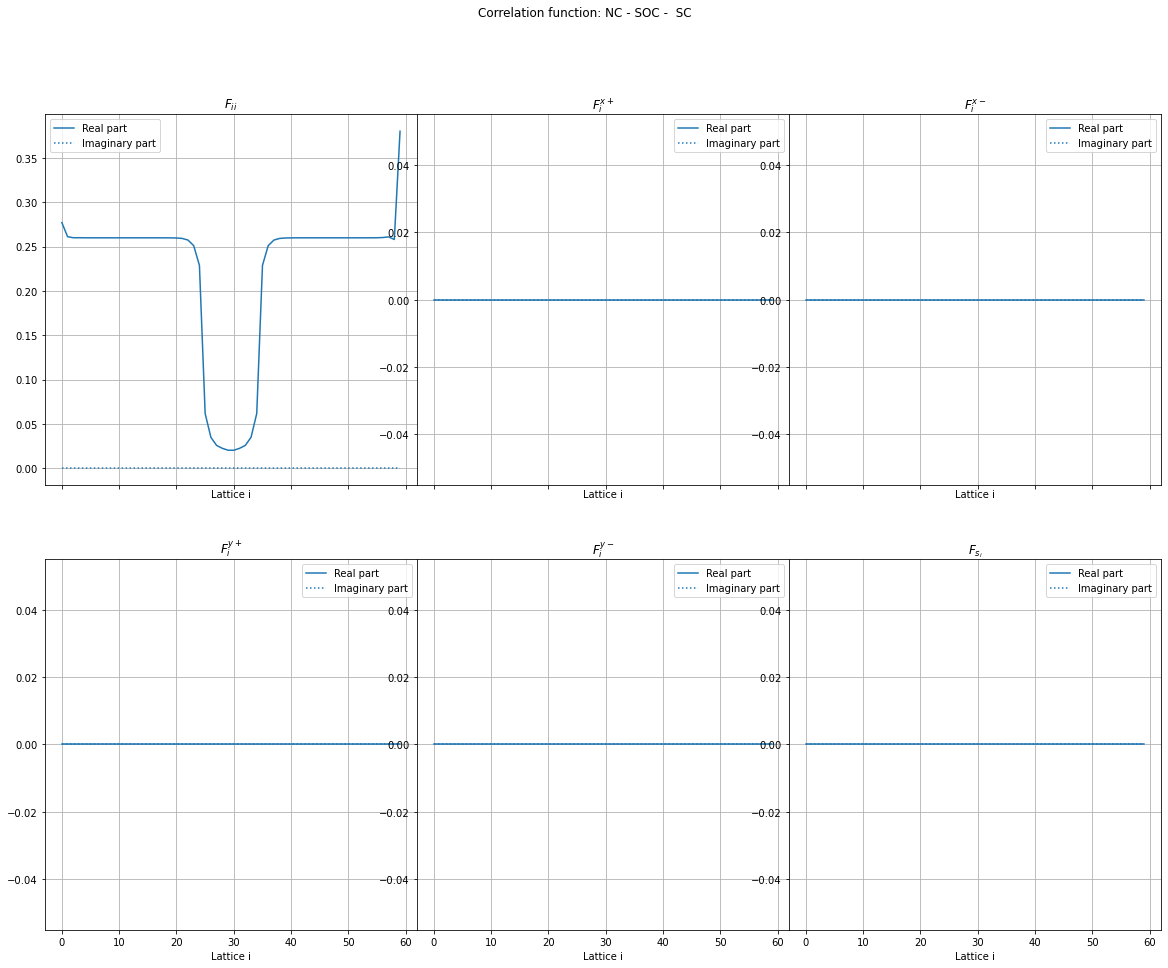

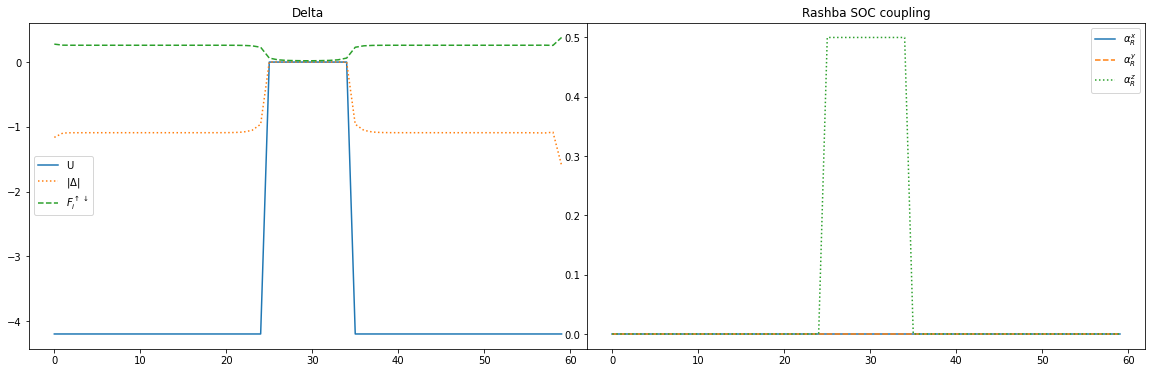

In [3]:
plot_pairing_amplitude(system, F_matrix) 
# it 1: diff 80.31784729526646
# it 2: diff 13.608228168595833

<h3> Now, calculate DOS and plot for each medium

In [4]:
from system_helper import local_density_of_states

In [5]:
%%time

# record runtime
import timeit
start = timeit.default_timer()

#ldos, energy_state = local_density_of_states(0.1, 0.1, -6, 6, system.L_y, system.L_z, system.eigenvalues, system.eigenvectors)
ldos, energy_state = system.ldos_from_problem(0.1, 0.15, -6, 6) # resolution, sigma, min e, max e #0.01, 0.03, -6, 6

# print runtime
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  63.61599475200637
CPU times: user 31.4 s, sys: 400 ms, total: 31.8 s
Wall time: 1min 3s


In [6]:
print(ldos.shape)
print(energy_state.shape)

(60, 120)
(120,)


(120,)
(60, 120)


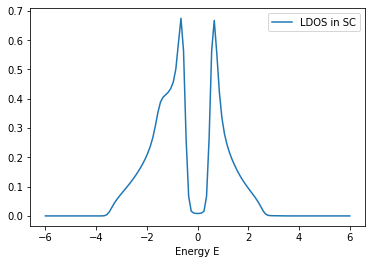

/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/plots.py:70: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(es, np.sum(ldos[L_sc_0:L_sc_0 + L_nc], axis=0)/L_nc, label='LDOS in NC')


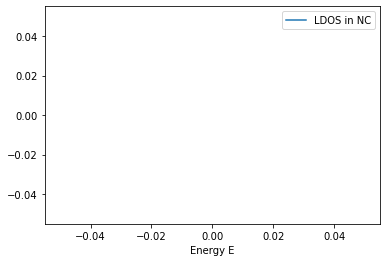

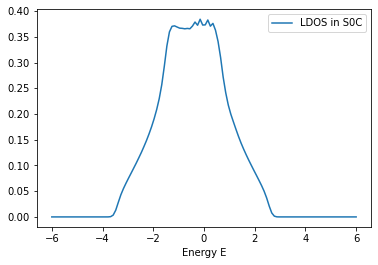

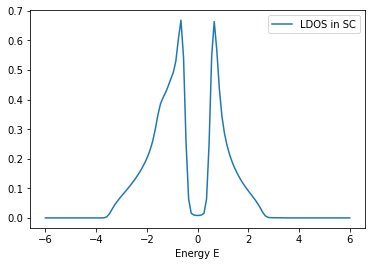

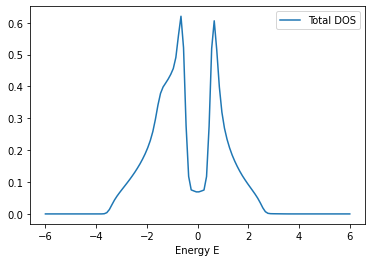

In [7]:
plot_density_of_states(energy_state, ldos, L_sc_0 = 25, L_nc=0, L_sc=25, L_soc=10)

Text(0, 0.5, '#')

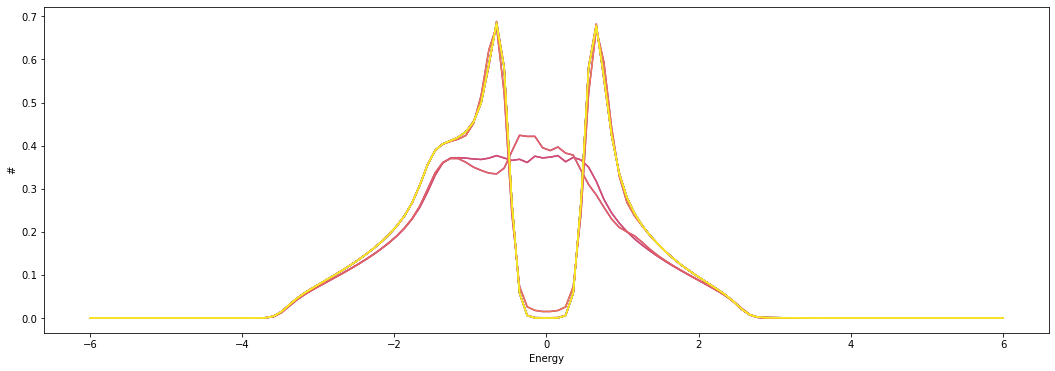

In [8]:
# plot all ldos for each medium

fig, ax = plt.subplots(figsize=(18, 6))
num_latticesites = ldos.shape[0]
step = 3
delta_range = 20
start = max(num_latticesites//2-delta_range, 0)
stop = min(num_latticesites//2+delta_range, num_latticesites)
#stop = Nx//2
for i in range(start, stop, step):
    ax.plot(energy_state, ldos[i, :], c = cm.plasma(float(i-start)/(stop-start)))
#ax.set_xlim()
ax.set_xlabel("Energy")
ax.set_ylabel("#")

Text(0, 0.5, 'Energy')

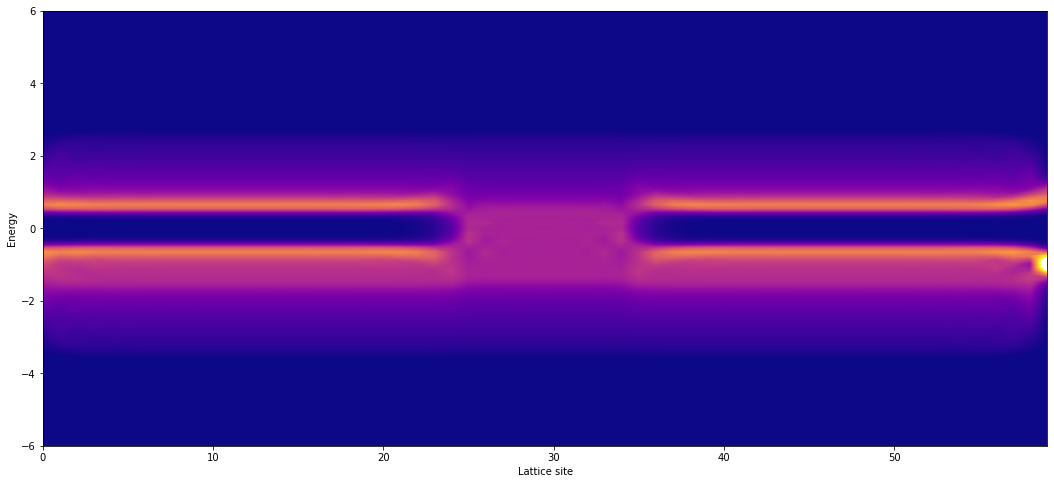

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.contourf(np.arange(ldos.shape[0]), energy_state, ldos.T, cmap=cm.plasma, levels=np.linspace(0, 1, 500))
ax.set_xlabel("Lattice site")
ax.set_ylabel("Energy")

Text(0, 0.5, '#')

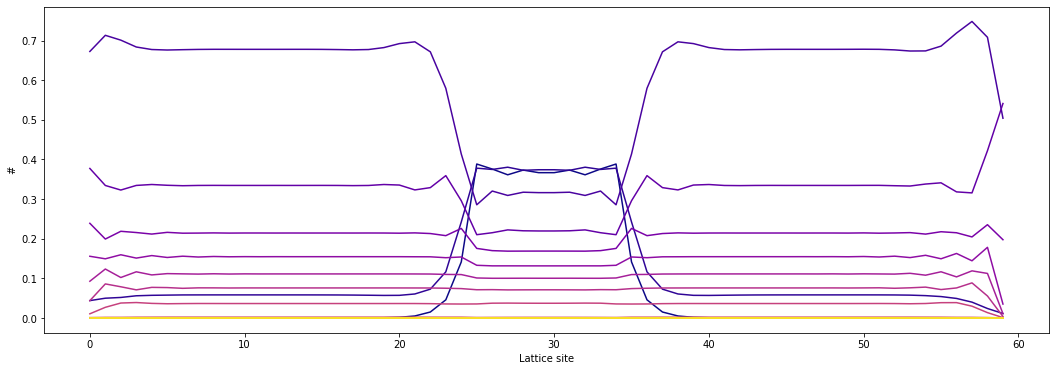

In [10]:
# Try to plot only middle energies
# Hva plottes egentlig?

fig = plt.figure(figsize=(18, 6))
num_energies = ldos.shape[1]
step = 3
delta_range = 50
start = num_energies//2
stop = min(num_energies//2+delta_range, num_energies)
for i in range(start, stop, step):
    plt.plot(ldos[:, i], c = cm.plasma(float(i-start)/(stop-start)))
plt.xlabel("Lattice site")
plt.ylabel("#")